In [106]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### NYTimes Data

In [132]:
data_nytimes = pd.read_csv('../data/nytimes_covid19_data/20200405_us-counties.csv')
data_nytimes.tail()

,date,county,state,fips,cases,deaths
33246,2020-04-04,Sublette,Wyoming,56035.0,1,0
33247,2020-04-04,Sweetwater,Wyoming,56037.0,4,0
33248,2020-04-04,Teton,Wyoming,56039.0,36,0
33249,2020-04-04,Uinta,Wyoming,56041.0,2,0
33250,2020-04-04,Washakie,Wyoming,56043.0,2,0


In [133]:
data_nytimes.shape

(33251, 6)

In [134]:
# drop logs where county is Unknown
data_nytimes = data_nytimes[data_nytimes.county != 'Unknown']

In [174]:
data_nytimes['county_state'] = data_nytimes.county + ', ' + data_nytimes.state
data_nytimes.tail()

,date,county,state,fips,cases,deaths,county_state
33246,2020-04-04,Sublette,Wyoming,56035.0,1,0,"Sublette, Wyoming"
33247,2020-04-04,Sweetwater,Wyoming,56037.0,4,0,"Sweetwater, Wyoming"
33248,2020-04-04,Teton,Wyoming,56039.0,36,0,"Teton, Wyoming"
33249,2020-04-04,Uinta,Wyoming,56041.0,2,0,"Uinta, Wyoming"
33250,2020-04-04,Washakie,Wyoming,56043.0,2,0,"Washakie, Wyoming"


In [136]:
data_nytimes.shape

(32815, 7)

In [137]:
# find top n counties with largest cumulative cases
top_n = 10
counties = data_nytimes.groupby('county_state').sum().cases.nlargest(top_n).index.tolist()

In [138]:
counties

['New York City, New York',
 'Westchester, New York',
 'Nassau, New York',
 'Suffolk, New York',
 'Cook, Illinois',
 'Wayne, Michigan',
 'Bergen, New Jersey',
 'King, Washington',
 'Los Angeles, California',
 'Rockland, New York']

In [175]:
data = data_nytimes[data_nytimes['county_state'].isin(counties)]
data.tail()

,date,county,state,fips,cases,deaths,county_state
32268,2020-04-04,New York City,New York,NaN,63307,2254,"New York City, New York"
32281,2020-04-04,Rockland,New York,36087.0,4872,69,"Rockland, New York"
32289,2020-04-04,Suffolk,New York,36103.0,12328,175,"Suffolk, New York"
32298,2020-04-04,Westchester,New York,36119.0,13080,197,"Westchester, New York"
33124,2020-04-04,King,Washington,53033.0,2900,204,"King, Washington"


In [140]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 3 to 33124
Data columns (total 7 columns):
date            393 non-null datetime64[ns]
county          393 non-null object
state           393 non-null object
fips            358 non-null float64
cases           393 non-null int64
deaths          393 non-null int64
county_state    393 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 24.6+ KB


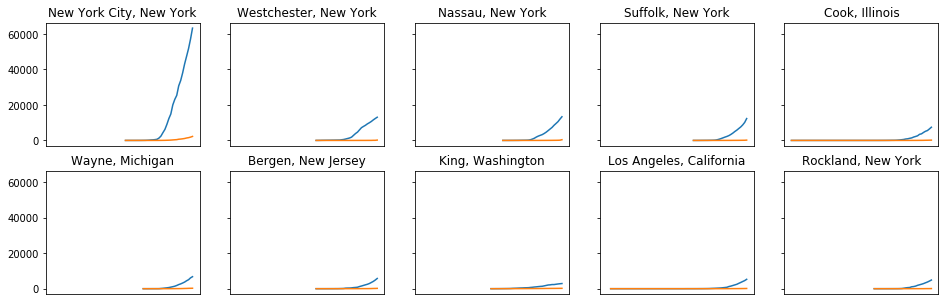

In [141]:
# initial plot
fig, axes = plt.subplots(2,5, figsize = (16,5), sharex=True, sharey=True, subplot_kw={ 'xticks': []})

for county, ax in zip(counties,axes.flat):
    data_per_county = data[data['county_state'] == county]
    ax.plot(data_per_county.date, data_per_county.cases)
    ax.plot(data_per_county.date, data_per_county.deaths)
    ax.set_title(county)

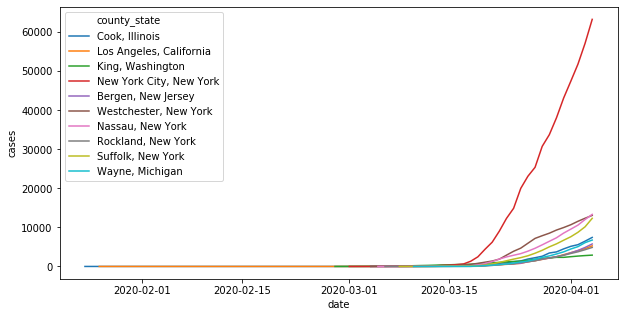

In [142]:
fig, ax = plt.subplots(figsize = (10,5))
#ax.plot(data_per_county.date, data_per_county.cases)
sns.lineplot(data=data, x='date', y='cases', hue='county_state')

In [143]:
# data only after 2020-03-01
data_halftime = data[(data['date'] > '2020-03-01')]


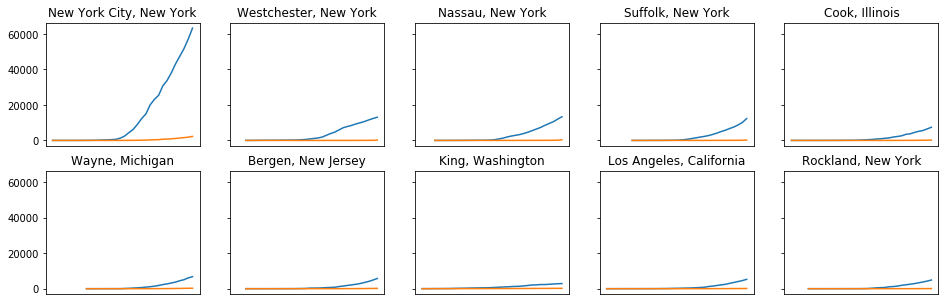

In [165]:
fig, axes = plt.subplots(2,5, figsize = (16,5), sharex=True, sharey=True, subplot_kw={ 'xticks': []})

for county, ax in zip(counties,axes.flat):
    data_per_county = data_halftime [data_halftime ['county_state'] == county]
    ax.plot(data_per_county.date, data_per_county.cases)
    ax.plot(data_per_county.date, data_per_county.deaths)
    ax.set_title(county)

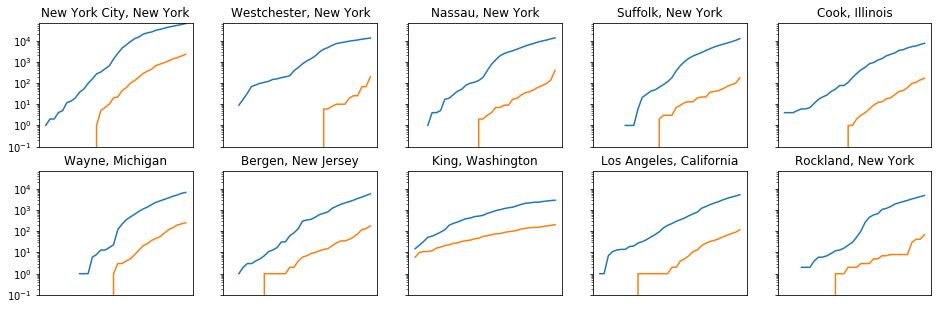

In [166]:
# log y-axis
fig, axes = plt.subplots(2,5, figsize = (16,5), sharex=True, sharey=True, subplot_kw={ 'xticks': []})

for county, ax in zip(counties,axes.flat):
    data_per_county = data_halftime [data_halftime ['county_state'] == county]
    ax.plot(data_per_county.date, data_per_county.cases)
    ax.plot(data_per_county.date, data_per_county.deaths)
    ax.set_title(county)
    ax.set_ylim(bottom=0.1)
    ax.set_yscale('log')

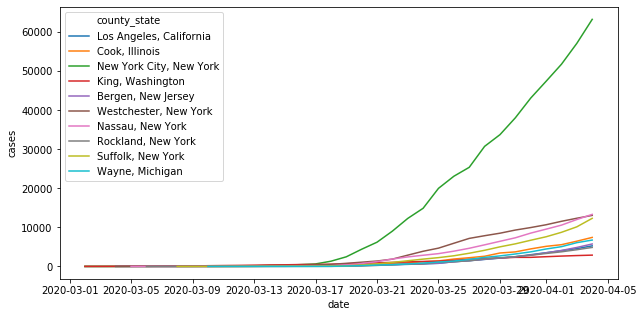

In [169]:
fig, ax = plt.subplots(figsize = (10,5))
#ax.plot(data_per_county.date, data_per_county.cases)
sns.lineplot(data=data_halftime, x='date', y='cases', hue='county_state')

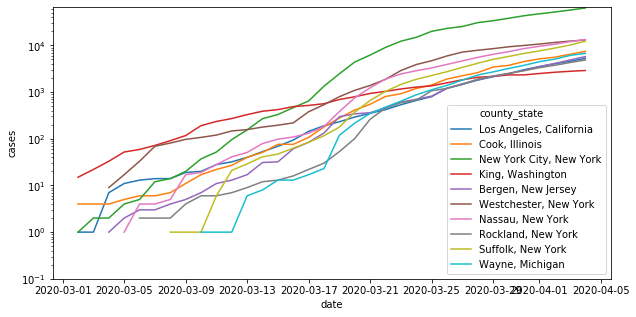

In [168]:
fig, ax = plt.subplots(figsize = (10,5))
#ax.plot(data_per_county.date, data_per_county.cases)
sns.lineplot(data=data_halftime, x='date', y='cases', hue='county_state')
ax.set_ylim(bottom=0.1)
ax.set_yscale('log');

In [176]:
# daily new cases
data_halftime.head()

,date,county,state,fips,cases,deaths,county_state
428,2020-03-02,Los Angeles,California,6037.0,1,0,"Los Angeles, California"
443,2020-03-02,Cook,Illinois,17031.0,4,0,"Cook, Illinois"
448,2020-03-02,New York City,New York,NaN,1,0,"New York City, New York"
453,2020-03-02,King,Washington,53033.0,15,6,"King, Washington"
462,2020-03-03,Los Angeles,California,6037.0,1,0,"Los Angeles, California"


In [181]:
# groupby automatically sort by number and alphabetic, so we have to sort the original data to append the difference later 
data_halftime_sorted = data_halftime.sort_values(by=['date','county_state'])
data_halftime_sorted.head() 

,date,county,state,fips,cases,deaths,county_state
443,2020-03-02,Cook,Illinois,17031.0,4,0,"Cook, Illinois"
453,2020-03-02,King,Washington,53033.0,15,6,"King, Washington"
428,2020-03-02,Los Angeles,California,6037.0,1,0,"Los Angeles, California"
448,2020-03-02,New York City,New York,NaN,1,0,"New York City, New York"
477,2020-03-03,Cook,Illinois,17031.0,4,0,"Cook, Illinois"


In [179]:
data_halftime.groupby(['date','county_state']).mean() # how to get the difference of same city but different dates?
# the problem is we have different number of counties in each date

fips  cases  deaths
date       county_state                                   
2020-03-02 Cook, Illinois           17031.0      4       0
           King, Washington         53033.0     15       6
           Los Angeles, California   6037.0      1       0
           New York City, New York      NaN      1       0
2020-03-03 Cook, Illinois           17031.0      4       0
...                                     ...    ...     ...
2020-04-04 New York City, New York      NaN  63307    2254
           Rockland, New York       36087.0   4872      69
           Suffolk, New York        36103.0  12328     175
           Wayne, Michigan          26163.0   6762     252
           Westchester, New York    36119.0  13080     197

[315 rows x 3 columns]

In [125]:
# Mortality rate

# increase rate

### JHU Data

In [10]:
data_jhu = pd.read_csv('../data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
data_jhu.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,51,55,56,58,69,77,82,84,93,112
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,0,2,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,79,100,127,174,239,286,316,316,452,475
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,19,22,0,0,30,30,30,37,40,42


In [7]:
data_jhu.shape

(3253, 86)

In [32]:
# top 10 counties with largest confirmed cases on 4/5/20
top10_index = data_jhu['4/5/20'].nlargest(10).index.tolist()

In [34]:
data_top10 = data_jhu.iloc[top10_index]
data_top10

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
1863,84036061,US,USA,840,36061.0,New York,New York,US,40.767273,-73.971526,...,25573,29776,33768,37453,43119,47439,51809,57159,63306,67551
1862,84036059,US,USA,840,36059.0,Nassau,New York,US,40.740665,-73.589419,...,4657,5537,6445,7344,8544,9554,10587,12024,13346,14398
1892,84036119,US,USA,840,36119.0,Westchester,New York,US,41.162784,-73.757417,...,7187,7875,8519,9326,9967,10683,11567,12351,13081,13723
1884,84036103,US,USA,840,36103.0,Suffolk,New York,US,40.883201,-72.801217,...,3385,4138,5023,5791,6713,7605,8746,10154,11370,13129
615,84017031,US,USA,840,17031.0,Cook,Illinois,US,41.841448,-87.816588,...,2239,2613,3445,3727,4496,5152,5575,6111,7439,8034
1317,84026163,US,USA,840,26163.0,Wayne,Michigan,US,42.280984,-83.281255,...,1810,2316,2704,3195,3735,4470,5069,6096,6762,7518
1780,84034003,US,USA,840,34003.0,Bergen,New Jersey,US,40.960109,-74.071643,...,1505,1838,2169,2482,2909,3494,4099,4866,5760,6187
209,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,...,1465,1465,1829,2474,3019,3518,4045,4566,4605,5955
1876,84036087,US,USA,840,36087.0,Rockland,New York,US,41.150279,-74.025605,...,1457,1896,2209,2511,2863,3321,3751,4289,4872,5326
367,84012086,US,USA,840,12086.0,Miami-Dade,Florida,US,25.611236,-80.551706,...,763,1003,1192,1632,2123,2202,2886,3364,3890,4146


In [55]:
# drop unnecessary columns
data_top10_cases = data_top10.drop(['UID','iso2','iso3','code3','FIPS','Country_Region','Lat','Long_','Combined_Key'], axis = 1)

# add new column with combined county and state
data_top10_cases['county_state'] = data_top10_cases.Admin2 + ', ' + data_top10_cases.Province_State

data_top10_cases = data_top10_cases.drop(['Admin2','Province_State'],axis=1)
data_top10_cases.head()

#data_top10.pivot(columns = 'Admin2')

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,county_state
1863,0,0,0,0,0,0,0,0,0,0,...,29776,33768,37453,43119,47439,51809,57159,63306,67551,"New York, New York"
1862,0,0,0,0,0,0,0,0,0,0,...,5537,6445,7344,8544,9554,10587,12024,13346,14398,"Nassau, New York"
1892,0,0,0,0,0,0,0,0,0,0,...,7875,8519,9326,9967,10683,11567,12351,13081,13723,"Westchester, New York"
1884,0,0,0,0,0,0,0,0,0,0,...,4138,5023,5791,6713,7605,8746,10154,11370,13129,"Suffolk, New York"
615,0,0,1,1,1,1,1,1,1,2,...,2613,3445,3727,4496,5152,5575,6111,7439,8034,"Cook, Illinois"


In [59]:
# reshape data
d = data_top10_cases.melt(id_vars=['county_state'], 
        var_name="date")
        #value_name="Value")
d.tail()

,county_state,date,value
745,"Wayne, Michigan",4/5/20,7518
746,"Bergen, New Jersey",4/5/20,6187
747,"Los Angeles, California",4/5/20,5955
748,"Rockland, New York",4/5/20,5326
749,"Miami-Dade, Florida",4/5/20,4146
